---
#<font face="Times New Roman"><font size="6"><center>**Modelo de predicción de casos de violencia intrafamiliar**
---

<font face="Times New Roman"><font size="4">Este modelo es capaz de predecir el tipo de acto violento que esta propenso a sufrir una persona segun su sexo, ubicacion, fecha y hora.<br>
Tambien es capaz de predecir una leve descripcion del agresor que incluye; sexo, edad, posible parentezco y si el acto violento puede ser mortal o no.

<font face="Times New Roman"><font size="5"><center>
<u>**Integrantes del proyecto**</u><br>
Levir Heladio Hernandez Suarez – 2201776<br>
Ricardo Andres Lopez Tarazona – 2201710<br>
Yefferson Olivos Rodriguez – 2201433

---
##<font face="Times New Roman"><font size="6"><center>**Columnas del dataset**

---

**(TOCA ARREGLAR PORQUE ESTAS SON DEL DATASET ANTIGUO)**

**1. ID: `<int>`**<br>
Numeración secuencial en el sistema con respecto al registro de los casos.
<br><br>
**2. Sexo de la victima: `<str>`**<br>
Hace referencia al sexo biológico de la víctima.<br>
**Valores del dataset:** [ Hombre , Mujer ]<br>
**Nota:** Conversión a `<int>` para mejor manejo [ 1 , 0 ]
<br><br>
**3. Grupo de edad de la victima: `<str>`**<br>
Corresponde al rango de edad en la que se encontraba la persona cuando fue víctima de la lesión.<br>
**Valores del dataset:** [ (00 a 04) , (05 a 09) , (15 a 17) , (25 a 29) , (35 a 39) , (40 a 44) , (55 a 59) , (60 a 64) , (65 a 69) , (70 a 74) ]<br>
**Nota:** Los rangos de tipo `<str>` limitan el indexado lógico, posible conversión a `<tuple>` de `<int>` para mejor indexado.
<br><br>
**Fecha de ocurrencia de los hechos**
>**4. Año del hecho: `<int>`**<br>
Corresponde al año de ocurrencia de los hechos.<br>
**Valores del dataset:** [ 2019 , 2017 , 2018 , 2016 ]
<br><br>
**5. Mes del hecho: `<str>`**
Corresponde al mes de ocurrencia de los hechos.<br>
**Valores del dataset:** [ enero , Febrero , febrero , marzo , abril , Junio , junio , agosto , octubre , diciembre ]<br>
**Nota:** Presenta algunos errores de introduccion de datos fácilmente arreglables.<br>
Conversión de meses a su correspondiente `<int>` para mejor manejo.
<br><br>
**6. Día del hecho: `<str>`**
Corresponde al día de la semana de ocurrencia de los hechos.<br>
**Valores del dataset:** [ Lunes , lunes , Martes , martes , miércoles , Viernes , viernes , Sábado , sábado , domingo ]<br>
**Nota:** Presenta algunos errores de introduccion de datos fácilmente arreglables.<br>
Conversión de dias a su correspondiente `<int>` para mejor manejo.

<br><br>**7. Departamento del hecho DANE: `<str>`**<br>
División territorial de mayor magnitud donde ocurrieron los hechos.<br>
**Valores del dataset:** [ Casanare , Cundinamarca , Guainía , Tolima , Meta , Antioquia , Chocó , Boyacá , Quindío , Santander ]<br>
**Nota:** Dejados como `<str>` debido a la poca relación con `<int>`.<br>
<br><br>
**8. Municipio del hecho DANE: `<str>`**<br>
División territorial específica donde ocurrieron los hechos.<br>
**Valores del dataset:** [ Cabuyaro , Tenerife , Santacruz , Villa de San Diego de Ubaté , Barrancabermeja , Belén , La Pedrera , Talaigua Nuevo , Silvania , Soplaviento ]<br>
**Nota:** Dejados como `<str>` debido a la poca relación con `<int>`.
<br><br>
**9. Lesion no fatal de causa externa: `<str>`**
Clase de lesión registrada en el sistema de información SIRDEC o SICLICO.<br>
**Valores del dataset:**<br>
[ Violencia entre otros familiares (Violencia intrafamiliar),<br>
Violencia contra el adulto mayor (Violencia intrafamiliar) ,<br>
Violencia contra niños, niñas y adolescentes (Violencia intrafamiliar) ]<br>
**Nota:** Conversión a `<int>` para mejor manejo [ 1 , 2 , 3 ] , haciendo el equivalente al nivel de violencia según la victima involucrada, dándole el nivel más alto a la violencia hacia menores de edad.
<br><br>
**10. Estado: `<str>`**<br>
Se indica si la información es definitiva o aún es preliminar (susceptible a modificación).<br>
**Valores del dataset:** [ Datos definitivos ]<br>
**Nota:** Columna a eliminar ya que a día de hoy todos los datos ya son definitivos.


---
#<font face="Times New Roman"><font size="6"><center>**Importación del Dataset y Librerias utilizadas**

---

In [1]:
#@title <font face="Times New Roman"><font size="5"><u>**Imports**

# Librerias generales
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Librerias para metricas y tratamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

# Librerias para metodos de machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Librerias para metodos de aprendizaje no supervisado
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

!gdown "https://www.datos.gov.co/api/views/sq8q-pnf5/rows.csv?accessType=DOWNLOAD" -O "/content/datasetViolencia.csv"

Downloading...
From: https://www.datos.gov.co/api/views/sq8q-pnf5/rows.csv?accessType=DOWNLOAD
To: /content/datasetViolencia.csv
4.26MB [00:00, 14.4MB/s]


---
#<font face="Times New Roman"><font size="6"><center>**Lectura, refinamiento y mapeo del Dataset**

---

In [2]:
#@title <font face="Times New Roman"><font size="5"><u>**Dataset**
dataset = pd.read_csv("/content/datasetViolencia.csv", delimiter=',')
dataset.head()

,Orden,Departamento,Municipio,semana,año,Grupo edad,Ciclo de vida,sexo_,area_,Barrio,...,sust_vict,fec_hecho,hora_hecho,escenario,zona_conf,nom_eve,nom_upgd,ndep_resi,nmun_resi,MES
0,1,SANTANDER,BUCARAMANGA,23,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Transicion I-V,...,2,12/06/2015,1899-12-31T06:30:00.000,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,SERVICLINICOS DROMEDICA SA,SANTANDER,BUCARAMANGA,06. Junio
1,2,SANTANDER,BUCARAMANGA,5,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Betania,...,2,04/02/2015,1899-12-31T10:00:00.000,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,02. Febrero
2,3,SANTANDER,BUCARAMANGA,29,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,GIRON,...,2,21/07/2015,1899-12-31T08:00:00.000,2.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,BUCARAMANGA,07. Julio
3,4,SANTANDER,BUCARAMANGA,16,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Maria Paz,...,2,22/04/2015,1899-12-31T13:30:00.000,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,04. Abril
4,5,SANTANDER,BUCARAMANGA,44,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Colorados,...,2,01/11/2015,1899-12-31T20:00:00.000,7.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,11. Noviembre


In [3]:
#@title <font face="Times New Roman"><font size="5"><u>**Procesamiento de datos**

# Funcion para cargar el dataset con opcion para 9 o 3 grupos de clasificacion
def cargarDataset(grupos):
  dataset = pd.read_csv("/content/datasetViolencia.csv", delimiter=',')
  del dataset["Orden"]
  del dataset["semana"]
  del dataset["Grupo edad"]
  del dataset["pac_hos_"]
  del dataset["naturaleza"]
  del dataset["actividad"]
  del dataset["sust_vict"]
  del dataset["escenario"]
  del dataset["zona_conf"]
  del dataset["ndep_resi"]
  del dataset["nmun_resi"]
  del dataset["año"]
  del dataset["MES"]

  for col in dataset.columns:
    if col == "con_fin_" or col == "edad_agre": pass
    else: dataset[col] = dataset[col].str.capitalize()

  def arreglarMunicipio(municipio):
    if "*" in municipio or "MUNICIPIO DESCONOCIDO" in municipio or "SIN ESPECIFICACIÓN ADICIONAL DE LUGAR" in municipio: municipio = np.nan
    return municipio

  dataset["Municipio"] = dataset["Municipio"].apply(arreglarMunicipio)

  dataset = dataset.replace({"Comuna":{"Sin informacion":np.nan}})
  def arreglarComuna(comuna):
    if type(comuna) == str:
      try:
        int(comuna[0])
        comuna = comuna[4:]
      except ValueError:
        pass
    return comuna

  dataset["Comuna"] = dataset["Comuna"].apply(arreglarComuna)
  dataset["Comuna"] = dataset["Comuna"].str.capitalize()

  dataset = dataset.replace({"Tipo de Seguridad Social":{"No asegurado":"No afiliado", "Excepción":np.nan, "Indeterminado":np.nan}})
  dataset = dataset.replace({"con_fin_":{2:0}})

  if grupos == 3: # Clasificacion con 3 grupos de violencia
    dataset = dataset.replace({"def_naturaleza":
    {
        "Negligencia y abandono":"Negligencia y abandono",
        "Violencia fisica":"Agresion fisica",
        "Acoso sexual":"Agresion sexual",
        "Actos sexuales":"Agresion sexual",
        "Otros actos sexuales":"Agresion sexual",
        "Abuso sexual":"Agresion sexual",
        "Acceso carnal":"Agresion sexual",
        "Violacion":"Agresion sexual",
        "Actos sexuales violencia":"Agresion sexual",
        "Otras violencias sexuales":"Agresion sexual",
        "Explotacion sexual, comercial niños, adolescentes":"Agresion sexual",
        "Trata de personas":"Agresion sexual",
        "Violencia psicologica":"Agresion sexual",
        "Sin informacion":"Agresion sexual",
        "Error: #n/a":"Agresion sexual"
    }})
  elif grupos == 9: # Clasificacion con 9 grupos de violencia
    dataset = dataset.replace({"def_naturaleza":
    {
        "Violacion":"Abuso sexual",
        "Actos sexuales violencia":"Abuso sexual",
        "Otros actos sexuales":"Acto sexual",
        "Actos sexuales":"Acto sexual",
        "Acceso carnal":"Abuso sexual",
        "Otras violencias sexuales":"Abuso sexual",
        "Explotacion sexual, comercial niños, adolescentes":"Explotacion sexual",
        "Sin informacion":np.nan,
        "Error: #n/a":np.nan
    }})

  dataset["TipoViolencia"] = dataset["def_naturaleza"]
  del dataset["def_naturaleza"]

  dataset = dataset.replace({"nom_actividad":{"Ninguna":np.nan}})
  dataset = dataset.replace({"edad_agre":{0:np.nan}})
  dataset = dataset.replace({"sexo_agre":{"Sd":np.nan, "I":np.nan}})

  dia = []; mes = []; anio = []
  for fecha in dataset["fec_hecho"]:
    fecha = str(fecha).split('/')
    if fecha != ["nan"]:
      dia_i, mes_i, anio_i = fecha
      dia_i = int(dia_i); mes_i = int(mes_i); anio_i = int(anio_i)
    else:
      dia_i, mes_i, anio_i = np.nan, np.nan, np.nan
    dia.append(dia_i)
    mes.append(mes_i)
    anio.append(anio_i)
  dataset["Dia"] = dia
  dataset["Mes"] = mes
  dataset["Año"] = anio
  del dataset["fec_hecho"]

  dataset["hora_hecho"].unique()
  def arreglarHora(hora):
    hora = str(hora)
    if hora != "nan": hora = float(hora[11:16].replace(':','.'))
    else: hora = np.nan
    return hora
  dataset["hora_hecho"] = dataset["hora_hecho"].apply(arreglarHora)

  dataset = dataset.rename(columns={
        "Ciclo de vida":"EtapaVida",
        "sexo_":"Sexo",
        "area_":"Area",
        "Tipo de Seguridad Social":"RegimenSalud",
        "con_fin_":"Sobrevivio",
        "version":"Version",
        "nom_actividad":"Oficio",
        "edad_agre":"EdadAgresor",
        "sexo_agre":"SexoAgresor",
        "parentezco_vict":"ParentescoAgresorVictima",
        "hora_hecho":"Hora",
        "nom_eve":"RegistroOficial",
        "nom_upgd":"EntidadPrestadora"
    })

  def mapaCol(col):
    return {k:v for v,k in enumerate(dataset[col].unique())}
  mapa = dict()
  for col in dataset.columns:
    mapa[col] = mapaCol(col)
  del mapa["Sobrevivio"]
  del mapa["EdadAgresor"]
  del mapa["Hora"]
  del mapa["Dia"]
  del mapa["Mes"]
  del mapa["Año"]

  dataset = dataset.replace(mapa)

  dataset = dataset[["Municipio","Mes","Hora","EtapaVida","Oficio","Sexo","TipoViolencia"]]
  dataset = dataset.dropna(subset="Mes")
  return dataset, mapa

In [4]:
#@title <font face="Times New Roman"><font size="5"><u>**Cargamos el dataset con 9 grupos de clasificacion**
dataset, mapa = cargarDataset(9)
dataset.head()

,Municipio,Mes,Hora,EtapaVida,Oficio,Sexo,TipoViolencia
0,0,6.0,6.3,0,0,0,0
1,0,2.0,10.0,0,1,0,1
2,0,7.0,8.0,0,0,1,0
3,0,4.0,13.3,0,1,1,1
4,0,11.0,20.0,0,0,1,2


---
#<font face="Times New Roman"><font size="6"><center>**Reconstrucción de Datos Temporales mediante<br>Algoritmos de Aprendizaje No-Supervisado**

---

<font face="Times New Roman"><font size="4">
Nuestra meta es completar los 6492 registros faltantes en la columna "Hora" utilizando un algoritmo no supervisado. Este algoritmo analiza las demás columnas y agrupa los registros en conjuntos de 177, asegurando que cada grupo tenga al menos 32 registros y una posible distribución normal. Posteriormente, calculamos la hora promedio por grupo y utilizamos el algoritmo k-means para predecir el grupo al que pertenecen los registros faltantes. De esta manera, podemos relacionarlos con la hora y completar los datos del dataset.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12156 entries, 0 to 12160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      12156 non-null  int64  
 1   Mes            12156 non-null  float64
 2   Hora           5664 non-null   float64
 3   EtapaVida      12156 non-null  int64  
 4   Oficio         12156 non-null  int64  
 5   Sexo           12156 non-null  int64  
 6   TipoViolencia  12156 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 759.8 KB


In [6]:
#@title <font face="Times New Roman"><font size="5"><u>**Algoritmo K-means**

subdataset = dataset[["Municipio","Mes","Hora","EtapaVida","Oficio","Sexo","TipoViolencia"]].dropna()

K = 177
scaler = StandardScaler()

X = scaler.fit_transform(subdataset[["Municipio","Mes","EtapaVida","Oficio","Sexo","TipoViolencia"]])
y = subdataset["Hora"]

kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

subdataset["Etiqueta"] = kmeans.labels_
etiqueta_hora = {cluster:hora for cluster, hora in subdataset.groupby("Etiqueta")["Hora"].mean().iteritems()}

def hora(registro):
  hora = registro["Hora"]
  if pd.isnull(hora):
    registro = registro[["Municipio","Mes","EtapaVida","Oficio","Sexo","TipoViolencia"]]
    registro = scaler.fit_transform([registro])
    etiqueta = kmeans.predict(registro)[0]
    hora = etiqueta_hora[etiqueta]
  return hora

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-2cbd456158ca>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  etiqueta_hora = {cluster:hora for cluster, hora in subdataset.groupby("Etiqueta")["Hora"].mean().iteritems()}


In [7]:
#@title <font face="Times New Roman"><font size="5"><u>**Reconstrucción de Datos Temporales**
dataset["Hora"] = dataset.apply(hora, axis=1)
dataset.head()

,Municipio,Mes,Hora,EtapaVida,Oficio,Sexo,TipoViolencia
0,0,6.0,6.3,0,0,0,0
1,0,2.0,10.0,0,1,0,1
2,0,7.0,8.0,0,0,1,0
3,0,4.0,13.3,0,1,1,1
4,0,11.0,20.0,0,0,1,2


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12156 entries, 0 to 12160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      12156 non-null  int64  
 1   Mes            12156 non-null  float64
 2   Hora           12156 non-null  float64
 3   EtapaVida      12156 non-null  int64  
 4   Oficio         12156 non-null  int64  
 5   Sexo           12156 non-null  int64  
 6   TipoViolencia  12156 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 759.8 KB


---
#<font face="Times New Roman"><font size="6"><center>**Corrección de grupos de clasificacion desbalanceados**

---

<font face="Times New Roman"><font size="4">
Debido a la gran variedad de tipos de ataques sexuales presentes en el dataset se decidio reducir todos estos a "Agresion sexual" para estar balanceado con las categorias de "Negligencia y abandono" y "Agresion fisica"

In [9]:
#@title <font face="Times New Roman"><font size="5"><u>**Tomamos la columna "TipoViolencia" del dataset con 3 grupos de clasificacion**
dataset3, mapa = cargarDataset(3)
dataset["TipoViolencia"] = dataset3["TipoViolencia"]
dataset.head()

,Municipio,Mes,Hora,EtapaVida,Oficio,Sexo,TipoViolencia
0,0,6.0,6.3,0,0,0,0
1,0,2.0,10.0,0,1,0,1
2,0,7.0,8.0,0,0,1,0
3,0,4.0,13.3,0,1,1,1
4,0,11.0,20.0,0,0,1,2


<Axes: >

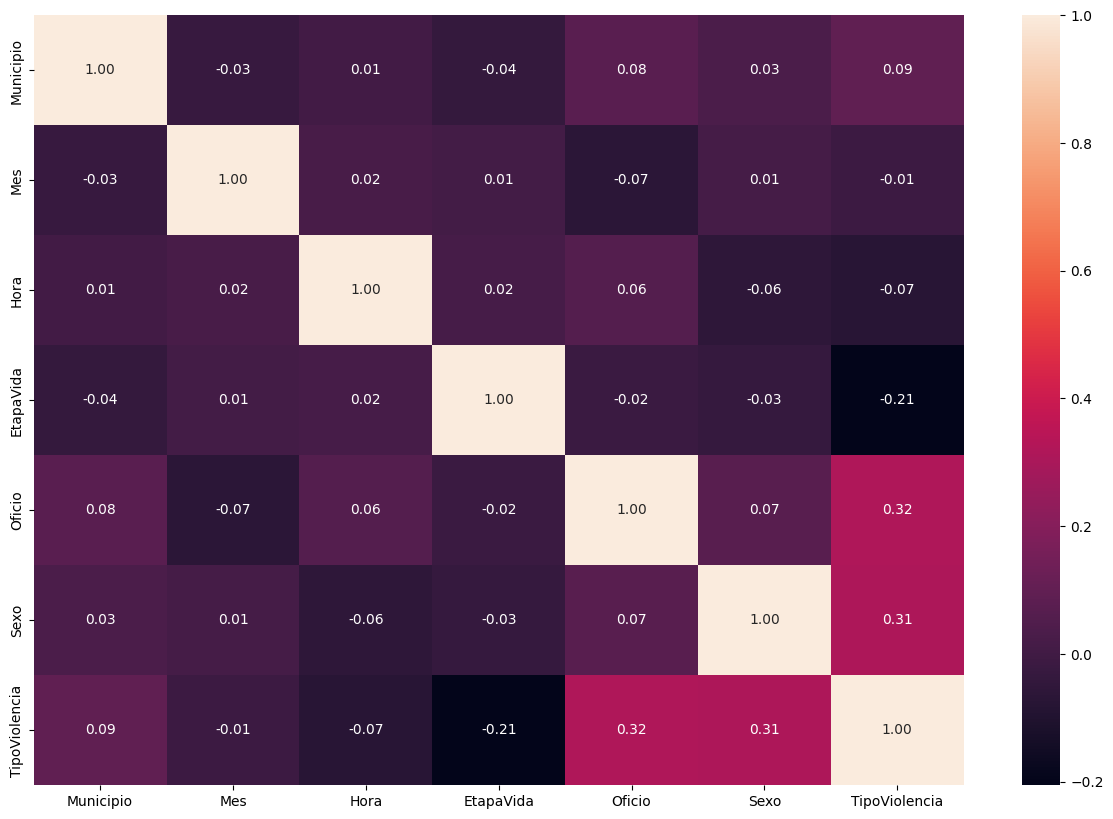

In [10]:
#@title **Matriz de correlación**
plt.subplots(figsize=(15,10))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

---
#<font face="Times New Roman"><font size="6"><center>**Métodos de Machine Learning<br>(Comparación de uso del PCA)**

---

In [11]:
X = dataset[["Municipio","Mes","Hora","EtapaVida", "Oficio","Sexo"]]
y = dataset["TipoViolencia"]

# Sin PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

GNB = GaussianNB()
DT = DecisionTreeClassifier(max_depth=9)
RF = RandomForestClassifier(n_estimators=7)
SVM = SVC(kernel="linear", gamma=0.001)

for est in [GNB, DT, RF]:
  est.fit(X_train,y_train)

# Con PCA
pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X)

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=0.2, shuffle=True)

GNB_PCA = GaussianNB()
DT_PCA = DecisionTreeClassifier(max_depth=7)
RF_PCA = RandomForestClassifier(n_estimators=6)
SVM_PCA = SVC(kernel="linear", gamma=0.001)

for est in [GNB_PCA, DT_PCA, RF_PCA]:
  est.fit(X_train_PCA,y_train_PCA)

In [12]:
#SVM.fit(X_train,y_train); # Sin PCA
#SVM_PCA.fit(X_train_PCA,y_train_PCA); # Con PCA

---
##<font face="Times New Roman"><font size="6"><center>**Método de Gaussian Naive Bayes**

---

---
###<font face="Times New Roman"><font size="6"><center>**Sin PCA**

---

In [13]:
#@title **Métrica Accuracy**
best_GNB = accuracy_score(GNB.predict(X_test), y_test)
print('Accuracy:  %.3f' %(best_GNB))

Accuracy:  0.556


In [14]:
#@title **Informe de clasificación**
print(classification_report(y_test, GNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       947
           1       0.51      0.51      0.51       843
           2       0.65      0.27      0.38       642

    accuracy                           0.56      2432
   macro avg       0.57      0.52      0.52      2432
weighted avg       0.57      0.56      0.53      2432



In [15]:
#@title **Matriz de confusión**
y_pred = GNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión \n",cm)
print("Total de tipos de violencia en el test")
total = np.sum(cm, axis=1)
print(total)
print('')
tipoViolencia_etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
for i in  range(3):
  print( tipoViolencia_etiquetas[i] + ":\n  Cantidad: ", total[i])
  print('  Aciertos: ' + str(cm[i][i]))
  print('  Porcentaje de aciertos: ' + str(cm[i][i] * 100 /total[i]) + '%')
  print('')

Matriz de confusión 
 [[751 158  38]
 [359 428  56]
 [217 253 172]]
Total de tipos de violencia en el test
[947 843 642]

"Negligencia y abandono":
  Cantidad:  947
  Aciertos: 751
  Porcentaje de aciertos: 79.30306230200634%

"Agresion fisica":
  Cantidad:  843
  Aciertos: 428
  Porcentaje de aciertos: 50.77105575326216%

"Agresion sexual":
  Cantidad:  642
  Aciertos: 172
  Porcentaje de aciertos: 26.79127725856698%



In [16]:
#@title **Cross Validation**
s = cross_val_score(GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
best_GNB_cvs = np.mean(s)
best_GNB_std_cvs = np.std(s)
print ("Accuracy: %.3f (+/- %.5f)"%(best_GNB_cvs, best_GNB_std_cvs))

Accuracy: 0.557 (+/- 0.01697)


---
###<font face="Times New Roman"><font size="6"><center>**Con PCA**

---

In [17]:
#@title **Métrica Accuracy**
best_GNB_PCA = accuracy_score(GNB_PCA.predict(X_test_PCA), y_test_PCA)
print('Accuracy:  %.3f' %(best_GNB))

Accuracy:  0.556


In [18]:
#@title **Informe de clasificación**
print(classification_report(y_test_PCA, GNB_PCA.predict(X_test_PCA)))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       908
           1       0.43      0.64      0.52       817
           2       0.63      0.30      0.40       707

    accuracy                           0.51      2432
   macro avg       0.54      0.50      0.49      2432
weighted avg       0.54      0.51      0.50      2432



In [19]:
#@title **Matriz de confusión**
y_pred = GNB_PCA.predict(X_test_PCA)
cm = confusion_matrix(y_test_PCA, y_pred)
print("Matriz de confusión \n",cm)
print("Total de tipos de violencia en el test")
total = np.sum(cm, axis=1)
print(total)
print('')
tipoViolencia_etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
for i in  range(3):
  print( tipoViolencia_etiquetas[i] + ":\n  Cantidad: ", total[i])
  print('  Aciertos: ' + str(cm[i][i]))
  print('  Porcentaje de aciertos: ' + str(cm[i][i] * 100 /total[i]) + '%')
  print('')

Matriz de confusión 
 [[506 339  63]
 [233 523  61]
 [154 344 209]]
Total de tipos de violencia en el test
[908 817 707]

"Negligencia y abandono":
  Cantidad:  908
  Aciertos: 506
  Porcentaje de aciertos: 55.72687224669603%

"Agresion fisica":
  Cantidad:  817
  Aciertos: 523
  Porcentaje de aciertos: 64.01468788249694%

"Agresion sexual":
  Cantidad:  707
  Aciertos: 209
  Porcentaje de aciertos: 29.56152758132956%



In [20]:
#@title **Cross Validation**
s = cross_val_score(GNB_PCA, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
best_GNB_cvs_PCA = np.mean(s)
best_GNB_std_cvs = np.std(s)
print ("Accuracy: %.3f (+/- %.5f)"%(best_GNB_cvs, best_GNB_std_cvs))

Accuracy: 0.557 (+/- 0.01036)


---
##<font face="Times New Roman"><font size="6"><center>**Método de Decision Tree**

---

---
###<font face="Times New Roman"><font size="6"><center>**Sin PCA**

---

In [21]:
#@title **Métrica Accuracy**
print('Accuracy: %.3f' %(accuracy_score(y_test, DT.predict(X_test))))

Accuracy: 0.674


In [22]:
#@title **Importancia de cada las columnas**
DT.feature_importances_

array([0.01653737, 0.0472169 , 0.097475  , 0.63460148, 0.10988527,
       0.09428398])

In [23]:
#@title **Informe de clasificación**
print(classification_report(y_test, DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       947
           1       0.71      0.68      0.69       843
           2       0.60      0.44      0.50       642

    accuracy                           0.67      2432
   macro avg       0.66      0.65      0.65      2432
weighted avg       0.67      0.67      0.66      2432



In [24]:
#@title **Matriz de confusión**
y_pred = DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión \n",cm)
print('')
print("Total de tipos de violencia en el test")
total = np.sum(cm, axis=1)
print(total)
print('')
tipoViolencia_etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
for i in  range(3):
  print( tipoViolencia_etiquetas[i] + ":\n  Cantidad: ", total[i])
  print('  Aciertos: ' + str(cm[i][i]))
  print('  Porcentaje de aciertos: ' + str(cm[i][i] * 100 /total[i]) + '%')
  print('')

Matriz de confusión 
 [[787  63  97]
 [178 571  94]
 [186 175 281]]

Total de tipos de violencia en el test
[947 843 642]

"Negligencia y abandono":
  Cantidad:  947
  Aciertos: 787
  Porcentaje de aciertos: 83.10454065469905%

"Agresion fisica":
  Cantidad:  843
  Aciertos: 571
  Porcentaje de aciertos: 67.73428232502965%

"Agresion sexual":
  Cantidad:  642
  Aciertos: 281
  Porcentaje de aciertos: 43.769470404984425%



In [25]:
#@title **Cross Validation**
s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("Accuracy: %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Accuracy: 0.679 (+/- 0.00799)


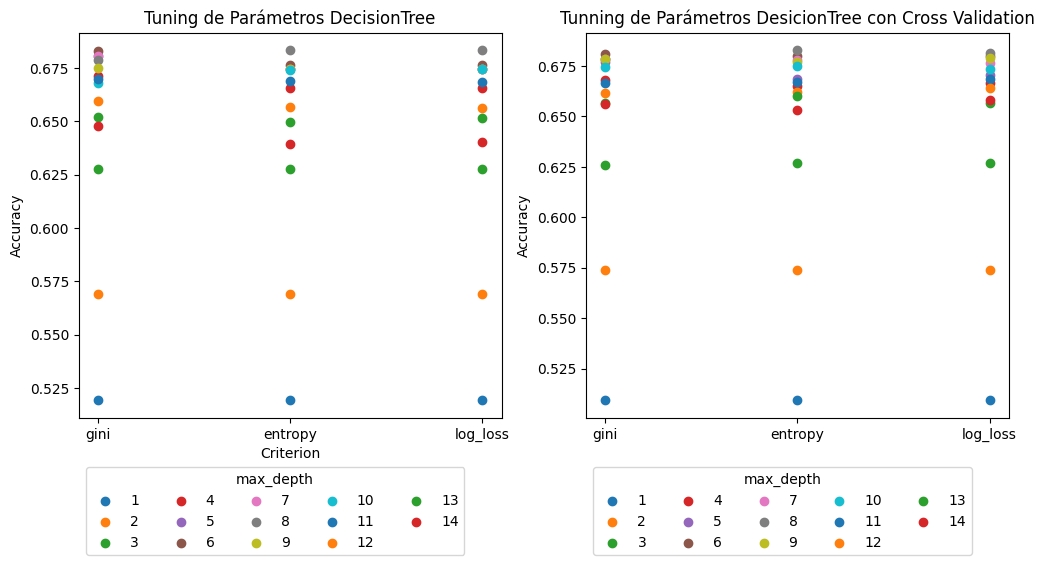


Mejor accuracy: 0.683 con criterion: entropy y max_depth:  8
Mejor accuracy con Cross Validation: 0.683 (+/- 0.01744) con criterion: entropy y max_depth: 8


In [26]:
#@title **Tunning max-depth y criterion**
best_DT = 0
max_depth_list = range(1, 15)
criterion_list = ['gini', 'entropy', 'log_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = DecisionTreeClassifier(criterion=j, max_depth=i)
        est.fit(X_train, y_train)
        accuracy = accuracy_score(y_test,est.predict(X_test))
        accuracies.append(accuracy)

        if accuracy > best_DT:
            best_DT = accuracy
            best_DT_criterion = j
            best_DT_md = i

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Tuning de Parámetros DecisionTree')


best_DT_cvs = 0
plt.subplot(1, 2, 2)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = DecisionTreeClassifier(criterion=j, max_depth=i)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        accuracy = np.mean(s)
        accuracies.append(accuracy)
        if accuracy > best_DT_cvs:
            best_DT_cvs = accuracy
            best_DT_criterion_cvs = j
            best_DT_md_cvs = i
            best_DT_accuracy_std_cvs = np.std(s)

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros DesicionTree con Cross Validation')

plt.subplots_adjust(wspace=0.2)

plt.show()

print('')
print('Mejor accuracy: %.3f' %(best_DT), 'con criterion:', best_DT_criterion, 'y max_depth: ', best_DT_md)
print('Mejor accuracy con Cross Validation: %.3f' %(best_DT_cvs),  '(+/- %.5f)' %(best_DT_accuracy_std_cvs), 'con criterion:'  ,best_DT_criterion_cvs, 'y max_depth:', best_DT_md_cvs)

---
###<font face="Times New Roman"><font size="6"><center>**Con PCA**

---

In [27]:
#@title **Métrica Accuracy**
print('Accuracy: %.3f' %(accuracy_score(y_test_PCA, DT_PCA.predict(X_test_PCA))))

Accuracy: 0.651


In [28]:
#@title **Importancia de cada las columnas**
DT_PCA.feature_importances_

array([0.02835554, 0.05736267, 0.00810188, 0.12102538, 0.78515452])

In [29]:
#@title **Informe de clasificación**
print(classification_report(y_test_PCA, DT_PCA.predict(X_test_PCA)))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       908
           1       0.68      0.69      0.68       817
           2       0.60      0.41      0.48       707

    accuracy                           0.65      2432
   macro avg       0.64      0.63      0.63      2432
weighted avg       0.65      0.65      0.64      2432



In [30]:
#@title **Matriz de confusión**
y_pred = DT_PCA.predict(X_test_PCA)
cm = confusion_matrix(y_test_PCA, y_pred)
print("Matriz de confusión \n",cm)
print('')
print("Total de tipos de violencia en el test")
total = np.sum(cm, axis=1)
print(total)
print('')
tipoViolencia_etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
for i in  range(3):
  print( tipoViolencia_etiquetas[i] + ":\n  Cantidad: ", total[i])
  print('  Aciertos: ' + str(cm[i][i]))
  print('  Porcentaje de aciertos: ' + str(cm[i][i] * 100 /total[i]) + '%')
  print('')

Matriz de confusión 
 [[731  67 110]
 [168 563  86]
 [218 200 289]]

Total de tipos de violencia en el test
[908 817 707]

"Negligencia y abandono":
  Cantidad:  908
  Aciertos: 731
  Porcentaje de aciertos: 80.50660792951543%

"Agresion fisica":
  Cantidad:  817
  Aciertos: 563
  Porcentaje de aciertos: 68.91064871481028%

"Agresion sexual":
  Cantidad:  707
  Aciertos: 289
  Porcentaje de aciertos: 40.87694483734088%



In [31]:
#@title **Cross Validation**
s = cross_val_score(DT_PCA, X_PCA, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("Accuracy: %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Accuracy: 0.660 (+/- 0.01643)


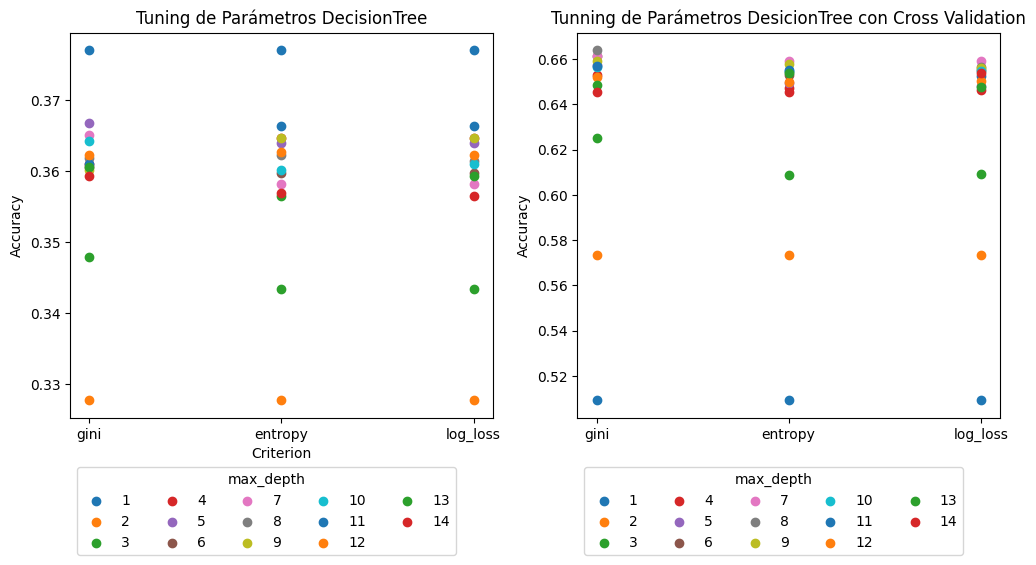


Mejor accuracy: 0.377 con criterion: gini y max_depth:  1
Mejor accuracy con Cross Validation: 0.664 (+/- 0.01793) con criterion: gini y max_depth: 8


In [32]:
#@title **Tunning max-depth y criterion**
best_DT_PCA = 0
max_depth_list = range(1, 15)
criterion_list = ['gini', 'entropy', 'log_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = DecisionTreeClassifier(criterion=j, max_depth=i)
        est.fit(X_train_PCA, y_train_PCA)
        accuracy = accuracy_score(y_test,est.predict(X_test_PCA))
        accuracies.append(accuracy)

        if accuracy > best_DT_PCA :
            best_DT_PCA  = accuracy
            best_DT_criterion = j
            best_DT_md = i

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Tuning de Parámetros DecisionTree')


best_DT_cvs_PCA = 0
plt.subplot(1, 2, 2)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = DecisionTreeClassifier(criterion=j, max_depth=i)
        s = cross_val_score(est, X_PCA, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        accuracy = np.mean(s)
        accuracies.append(accuracy)
        if accuracy > best_DT_cvs_PCA:
            best_DT_cvs_PCA = accuracy
            best_DT_criterion_cvs = j
            best_DT_md_cvs = i
            best_DT_accuracy_std_cvs = np.std(s)

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros DesicionTree con Cross Validation')

plt.subplots_adjust(wspace=0.2)

plt.show()

print('')
print('Mejor accuracy: %.3f' %(best_DT_PCA), 'con criterion:', best_DT_criterion, 'y max_depth: ', best_DT_md)
print('Mejor accuracy con Cross Validation: %.3f' %(best_DT_cvs_PCA),  '(+/- %.5f)' %(best_DT_accuracy_std_cvs), 'con criterion:'  ,best_DT_criterion_cvs, 'y max_depth:', best_DT_md_cvs)

---
##<font face="Times New Roman"><font size="6"><center>**Método de Random Forest**

---

---
###<font face="Times New Roman"><font size="6"><center>**Sin PCA**

---

In [33]:
#@title **Métrica Accuracy**
print("Accuracy con Random Forest: %.3f" %(accuracy_score(RF.predict(X_test), y_test)))

Accuracy con Random Forest: 0.636


In [34]:
#@title **Importancia de cada las columnas**
RF.feature_importances_

array([0.02397376, 0.14881376, 0.27637801, 0.38393045, 0.0949337 ,
       0.07197031])

In [35]:
#@title **Informe de clasificación**
print(classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.76      0.71       947
           1       0.64      0.66      0.65       843
           2       0.53      0.42      0.47       642

    accuracy                           0.64      2432
   macro avg       0.62      0.61      0.61      2432
weighted avg       0.63      0.64      0.63      2432



In [36]:
#@title **Matriz de confusión**
y_pred = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión \n",cm)
print('')
print("Total de tipos de violencia en el test")
total = np.sum(cm, axis=1)
print(total)
print('')
tipoViolencia_etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
for i in  range(3):
  print( tipoViolencia_etiquetas[i] + ":\n  Cantidad: ", total[i])
  print('  Aciertos: ' + str(cm[i][i]))
  print('  Porcentaje de aciertos: ' + str(cm[i][i] * 100 /total[i]) + '%')
  print('')

Matriz de confusión 
 [[716 112 119]
 [166 560 117]
 [175 197 270]]

Total de tipos de violencia en el test
[947 843 642]

"Negligencia y abandono":
  Cantidad:  947
  Aciertos: 716
  Porcentaje de aciertos: 75.60718057022176%

"Agresion fisica":
  Cantidad:  843
  Aciertos: 560
  Porcentaje de aciertos: 66.42941874258601%

"Agresion sexual":
  Cantidad:  642
  Aciertos: 270
  Porcentaje de aciertos: 42.05607476635514%



In [37]:
#@title **Cross Validation**
s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("Accuracy: %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Accuracy: 0.646 (+/- 0.01240)


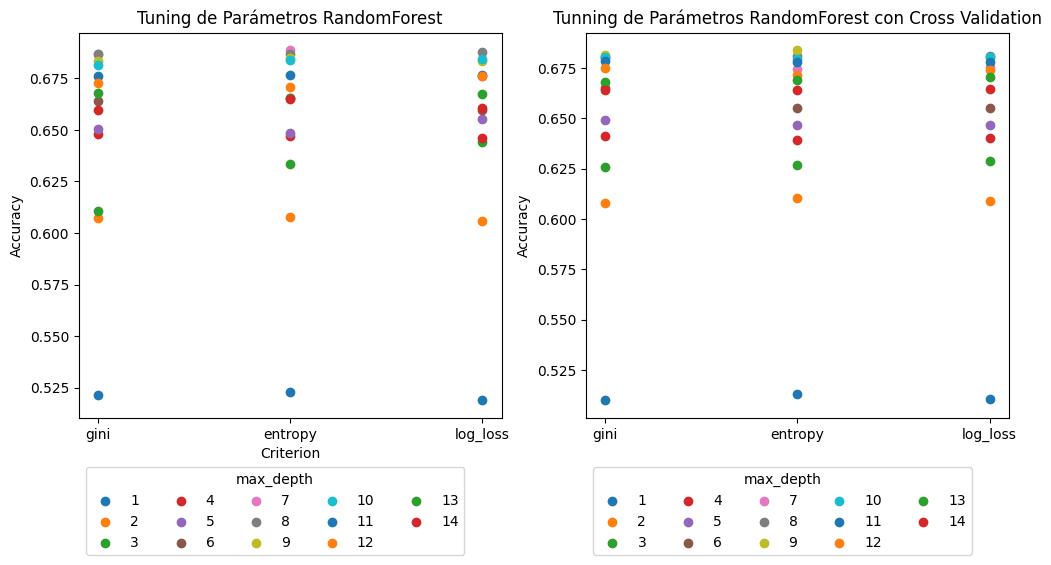


Mejor accuracy: 0.689 con criterion: entropy y max_depth:  7
Mejor accuracy con Cross Validation: 0.684 (+/- 0.01302) con criterion: entropy y max_depth: 9


In [38]:
#@title **Tunning max-depth y criterion**
best_RF = 0
max_depth_list = range(1, 15)
criterion_list = ['gini', 'entropy', 'log_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = RandomForestClassifier(criterion=j, max_depth=i)
        est.fit(X_train, y_train)
        accuracy = accuracy_score(est.predict(X_test), y_test)
        accuracies.append(accuracy)

        if accuracy > best_RF:
            best_RF = accuracy
            best_RF_criterion = j
            best_RF_md = i

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Tuning de Parámetros RandomForest')

best_RF_cvs = 0
plt.subplot(1, 2, 2)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = RandomForestClassifier(criterion=j, max_depth=i)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        accuracy = np.mean(s)
        accuracies.append(accuracy)
        if accuracy > best_RF_cvs:
            best_RF_cvs = accuracy
            best_RF_criterion_cvs = j
            best_RF_md_cvs = i
            best_RF_accuracy_std_cvs = np.std(s)

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros RandomForest con Cross Validation')

plt.subplots_adjust(wspace=0.2)

plt.show()

print('')
print('Mejor accuracy: %.3f' %(best_RF), 'con criterion:', best_RF_criterion, 'y max_depth: ', best_RF_md)
print('Mejor accuracy con Cross Validation: %.3f' %(best_RF_cvs),  '(+/- %.5f)' %(best_RF_accuracy_std_cvs), 'con criterion:'  ,best_RF_criterion_cvs, 'y max_depth:', best_RF_md_cvs)

---
###<font face="Times New Roman"><font size="6"><center>**Con PCA**

---

In [39]:
#@title **Métrica Accuracy**
print("Accuracy con Random Forest: %.3f" %(accuracy_score(RF_PCA.predict(X_test_PCA), y_test_PCA)))

Accuracy con Random Forest: 0.636


In [40]:
#@title **Importancia de cada las columnas**
RF_PCA.feature_importances_

array([0.11509694, 0.13910491, 0.09698861, 0.17769688, 0.47111266])

In [41]:
#@title **Informe de clasificación**
print(classification_report(y_test_PCA, RF_PCA.predict(X_test_PCA)))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       908
           1       0.65      0.64      0.65       817
           2       0.56      0.43      0.49       707

    accuracy                           0.64      2432
   macro avg       0.62      0.62      0.62      2432
weighted avg       0.63      0.64      0.63      2432



In [42]:
#@title **Matriz de confusión**
y_pred = RF_PCA.predict(X_test_PCA)
cm = confusion_matrix(y_test_PCA, y_pred)
print("Matriz de confusión \n",cm)
print('')
print("Total de tipos de violencia en el test")
total = np.sum(cm, axis=1)
print(total)
print('')
tipoViolencia_etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
for i in  range(3):
  print( tipoViolencia_etiquetas[i] + ":\n  Cantidad: ", total[i])
  print('  Aciertos: ' + str(cm[i][i]))
  print('  Porcentaje de aciertos: ' + str(cm[i][i] * 100 /total[i]) + '%')
  print('')

Matriz de confusión 
 [[715  84 109]
 [163 524 130]
 [204 196 307]]

Total de tipos de violencia en el test
[908 817 707]

"Negligencia y abandono":
  Cantidad:  908
  Aciertos: 715
  Porcentaje de aciertos: 78.74449339207048%

"Agresion fisica":
  Cantidad:  817
  Aciertos: 524
  Porcentaje de aciertos: 64.13708690330478%

"Agresion sexual":
  Cantidad:  707
  Aciertos: 307
  Porcentaje de aciertos: 43.42291371994342%



In [43]:
#@title **Cross Validation**
s = cross_val_score(RF_PCA, X_PCA, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("Accuracy: %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Accuracy: 0.643 (+/- 0.00995)


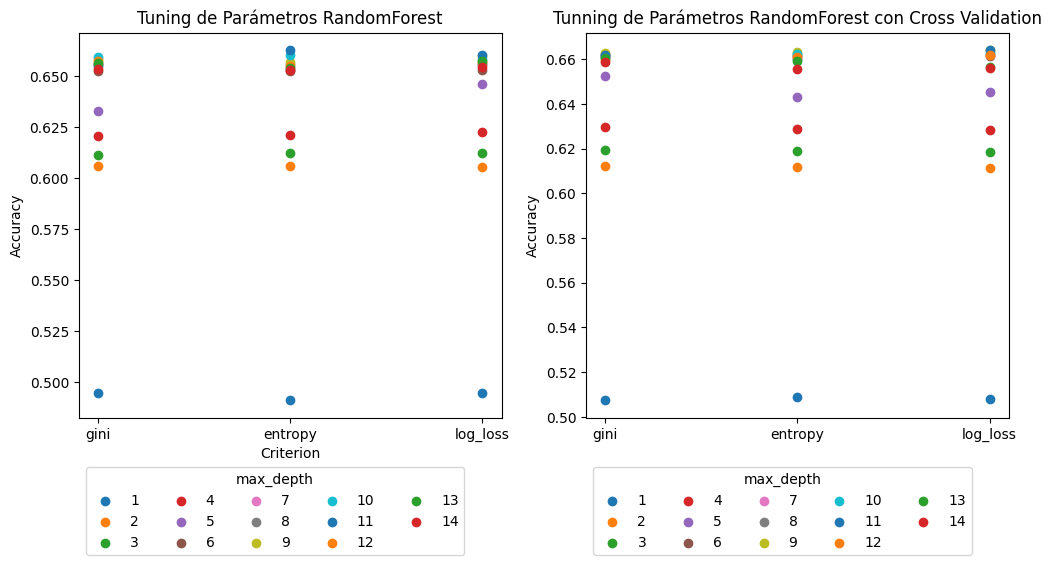


Mejor accuracy: 0.663 con criterion: entropy y max_depth:  11
Mejor accuracy con Cross Validation: 0.664 (+/- 0.00977) con criterion: log_loss y max_depth: 9


In [44]:
#@title **Tunning max-depth y criterion**
best_RF_PCA = 0
max_depth_list = range(1, 15)
criterion_list = ['gini', 'entropy', 'log_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = RandomForestClassifier(criterion=j, max_depth=i)
        est.fit(X_train_PCA, y_train_PCA)
        accuracy = accuracy_score(est.predict(X_test_PCA), y_test_PCA)
        accuracies.append(accuracy)

        if accuracy > best_RF_PCA:
            best_RF_PCA = accuracy
            best_RF_criterion = j
            best_RF_md = i

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Tuning de Parámetros RandomForest')

best_RF_cvs_PCA = 0
plt.subplot(1, 2, 2)
for i in max_depth_list:
    accuracies = []
    for j in criterion_list:
        est = RandomForestClassifier(criterion=j, max_depth=i)
        s = cross_val_score(est, X_PCA, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        accuracy = np.mean(s)
        accuracies.append(accuracy)
        if accuracy > best_RF_cvs_PCA:
            best_RF_cvs_PCA = accuracy
            best_RF_criterion_cvs = j
            best_RF_md_cvs = i
            best_RF_accuracy_std_cvs = np.std(s)

    plt.scatter(criterion_list, accuracies, label=i)

plt.legend(max_depth_list, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros RandomForest con Cross Validation')

plt.subplots_adjust(wspace=0.2)

plt.show()

print('')
print('Mejor accuracy: %.3f' %(best_RF_PCA), 'con criterion:', best_RF_criterion, 'y max_depth: ', best_RF_md)
print('Mejor accuracy con Cross Validation: %.3f' %(best_RF_cvs_PCA),  '(+/- %.5f)' %(best_RF_accuracy_std_cvs), 'con criterion:'  ,best_RF_criterion_cvs, 'y max_depth:', best_RF_md_cvs)

---
##<font face="Times New Roman"><font size="6"><center>**Método de Deep Learning**

---

In [45]:
#@title **Sin PCA**
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[6, 1, 1]),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(9, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=8)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
best_DL = test_acc

Epoch 1/10
1216/1216 [==============================] - 9s 3ms/step - loss: 1.0405 - accuracy: 0.4849
Epoch 2/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.9938 - accuracy: 0.5216
Epoch 3/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.9798 - accuracy: 0.5372
Epoch 4/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.9614 - accuracy: 0.5505
Epoch 5/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.9575 - accuracy: 0.5611
Epoch 6/10
1216/1216 [==============================] - 4s 4ms/step - loss: 0.9431 - accuracy: 0.5667
Epoch 7/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.9481 - accuracy: 0.5623
Epoch 8/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.9582 - accuracy: 0.5540
Epoch 9/10
1216/1216 [==============================] - 4s 4ms/step - loss: 0.9655 - accuracy: 0.5424
Epoch 10/10
76/76 [==============================] - 0s 2ms/step - loss: 0.9415 - 

In [46]:
#@title **Con PCA**
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[5, 1, 1]),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(9, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_PCA, y_train_PCA, epochs=10, batch_size=8)

test_loss, test_acc = model.evaluate(X_test_PCA, y_test_PCA)
print('Test accuracy:', test_acc)
best_DL_PCA = test_acc

Epoch 1/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.9732 - accuracy: 0.5678
Epoch 2/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8831 - accuracy: 0.6199
Epoch 3/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8560 - accuracy: 0.6300
Epoch 4/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8456 - accuracy: 0.6365
Epoch 5/10
1216/1216 [==============================] - 4s 4ms/step - loss: 0.8991 - accuracy: 0.6006
Epoch 6/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8472 - accuracy: 0.6323
Epoch 7/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8491 - accuracy: 0.6297
Epoch 8/10
1216/1216 [==============================] - 4s 4ms/step - loss: 0.8234 - accuracy: 0.6510
Epoch 9/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8158 - accuracy: 0.6532
Epoch 10/10
76/76 [==============================] - 0s 2ms/step - loss: 0.8152 - 

---
##<font face="Times New Roman"><font size="6"><center>**Comparación de Métodos de Machine Learning**

---

---
###<font face="Times New Roman"><font size="6"><center>**Sin PCA**

---

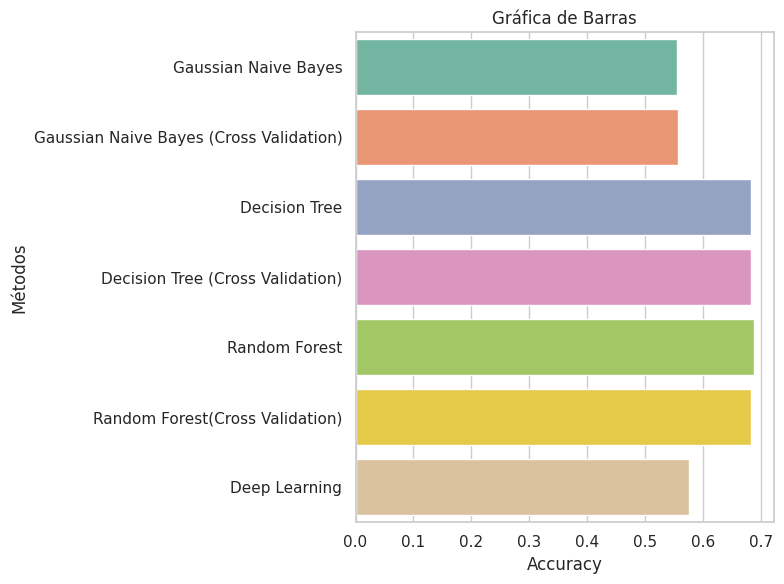

In [48]:
metodos = ['Gaussian Naive Bayes', 'Gaussian Naive Bayes (Cross Validation)', 'Decision Tree', 'Decision Tree (Cross Validation)', 'Random Forest', 'Random Forest(Cross Validation)', 'Deep Learning']
accuracy = [best_GNB, best_GNB_cvs, best_DT, best_DT_cvs, best_RF, best_RF_cvs, best_DL]

# Crear un dataframe con los datos
data = {'Métodos': metodos, 'Accuracy': accuracy}
df = pd.DataFrame(data)

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Métodos', data=df, palette='Set2')

# Configurar los ejes y las etiquetas
plt.xlabel('Accuracy')
plt.ylabel('Métodos')
plt.title('Gráfica de Barras')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

---
###<font face="Times New Roman"><font size="6"><center>**Con PCA**

---

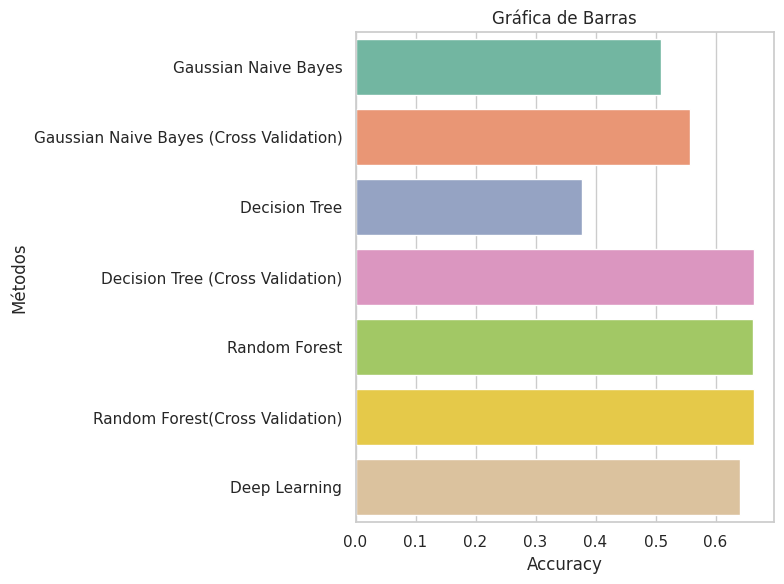

In [49]:
metodos = ['Gaussian Naive Bayes', 'Gaussian Naive Bayes (Cross Validation)', 'Decision Tree', 'Decision Tree (Cross Validation)', 'Random Forest', 'Random Forest(Cross Validation)', 'Deep Learning']
accuracy = [best_GNB_PCA, best_GNB_cvs_PCA, best_DT_PCA, best_DT_cvs_PCA, best_RF_PCA, best_RF_cvs_PCA, best_DL_PCA]

# Crear un dataframe con los datos
data = {'Métodos': metodos, 'Accuracy': accuracy}
df = pd.DataFrame(data)

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Métodos', data=df, palette='Set2')

# Configurar los ejes y las etiquetas
plt.xlabel('Accuracy')
plt.ylabel('Métodos')
plt.title('Gráfica de Barras')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

---
##<font face="Times New Roman"><font size="6"><center>**Conclusiones**

---

<font face="Times New Roman"><font size="4">Como podemos observar el algoritmo PCA de reduccion de caracteristicas no logra mejorar de forma exagerada los algoritmos, sin embargo se notan mejoras al clasificas los grupos de violencia con menos registros.<br><br>
Ademas de hacer que el metodo de Deep Leerning mejorara mucho mas rapido su accuracy en cada epoca.

---
#<font face="Times New Roman"><font size="6"><center>**Métodos de aprendizaje no supervisado**

---

In [55]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

clases = 3
kmeans = KMeans(n_clusters=clases)
agglomerative = AgglomerativeClustering(n_clusters=clases)
DBS = DBSCAN(eps=0.5, min_samples=1000)
ward = AgglomerativeClustering(n_clusters=clases, linkage='ward')

for est in [kmeans, DBS, agglomerative, ward]:
  est.fit(X_PCA)

labels_kmeans = kmeans.labels_
labels_DBS = DBS.labels_
labels_agglomerative = agglomerative.labels_
labels_ward = ward.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---
##<font face="Times New Roman"><font size="6"><center>**Algoritmo de K-means**

---

 - Total de etiquetas: 12156
 - Etiquetas predichas correctamente: 4535


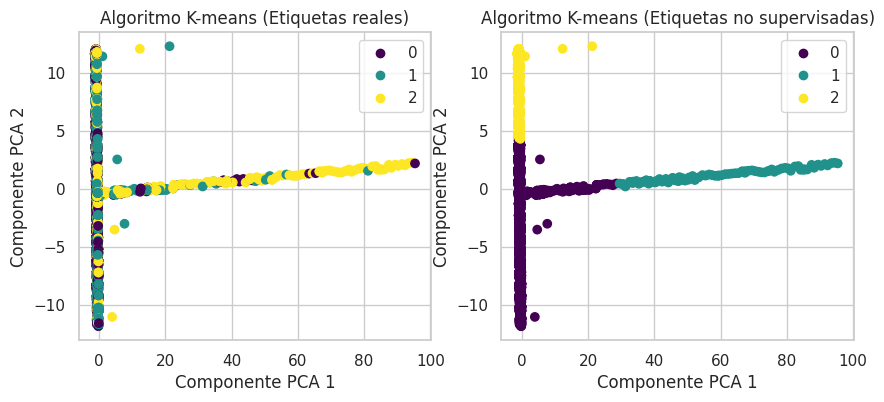

In [56]:
print(f" - Total de etiquetas: {len(y)}\n - Etiquetas predichas correctamente: {list(y-labels_kmeans).count(0)}")

plt.figure(figsize=(10,4))
plt.subplot(121)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap="viridis")
plt.title("Algoritmo K-means (Etiquetas reales)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(y)))

plt.subplot(122)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels_kmeans, cmap="viridis")
plt.title("Algoritmo K-means (Etiquetas no supervisadas)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(labels_kmeans)))

---
##<font face="Times New Roman"><font size="6"><center>**Algoritmo de DBSCAN**

---

 - Total de etiquetas: 12156
 - Etiquetas predichas correctamente: 1981


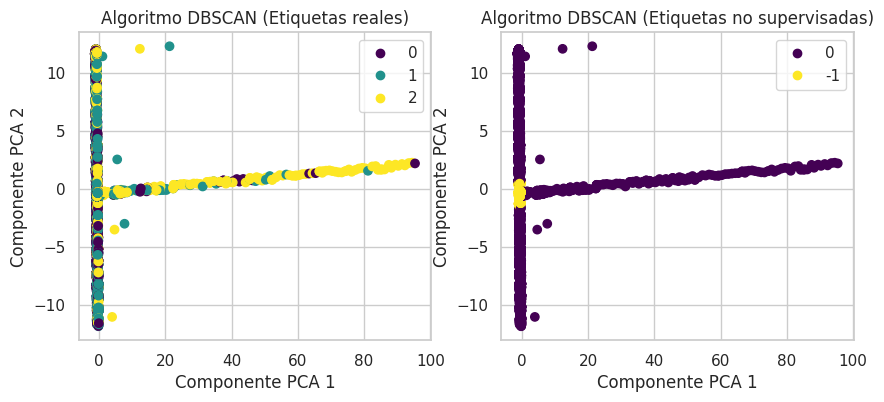

In [57]:
print(f" - Total de etiquetas: {len(y)}\n - Etiquetas predichas correctamente: {list(y-labels_DBS).count(0)}")

plt.figure(figsize=(10,4))
plt.subplot(121)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap="viridis")
plt.title("Algoritmo DBSCAN (Etiquetas reales)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(y)))

plt.subplot(122)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels_DBS, cmap="viridis")
plt.title("Algoritmo DBSCAN (Etiquetas no supervisadas)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(labels_DBS)))

---
##<font face="Times New Roman"><font size="6"><center>**Algoritmo de Clustering-Aglomerativo**

---

 - Total de etiquetas: 12156
 - Etiquetas predichas correctamente: 4659


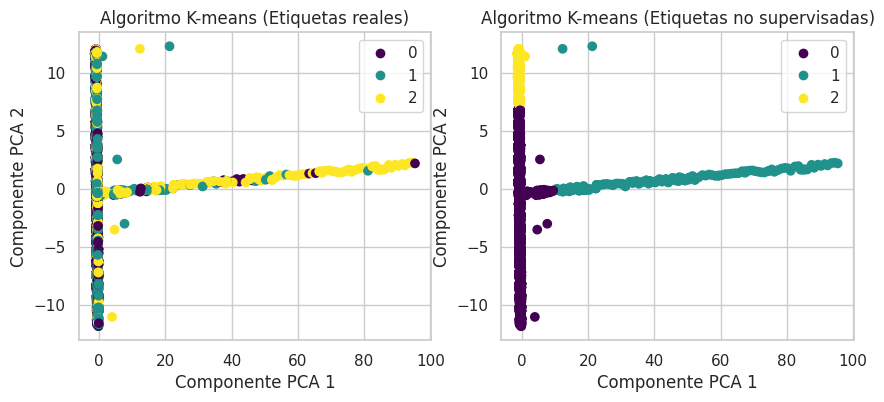

In [58]:
print(f" - Total de etiquetas: {len(y)}\n - Etiquetas predichas correctamente: {list(y-labels_agglomerative).count(0)}")

plt.figure(figsize=(10,4))
plt.subplot(121)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap="viridis")
plt.title("Algoritmo K-means (Etiquetas reales)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(y)))

plt.subplot(122)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels_agglomerative, cmap="viridis")
plt.title("Algoritmo K-means (Etiquetas no supervisadas)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(labels_agglomerative)))

---
##<font face="Times New Roman"><font size="6"><center>**Algoritmo de Ward**

---

 - Total de etiquetas: 12156
 - Etiquetas predichas correctamente: 4659


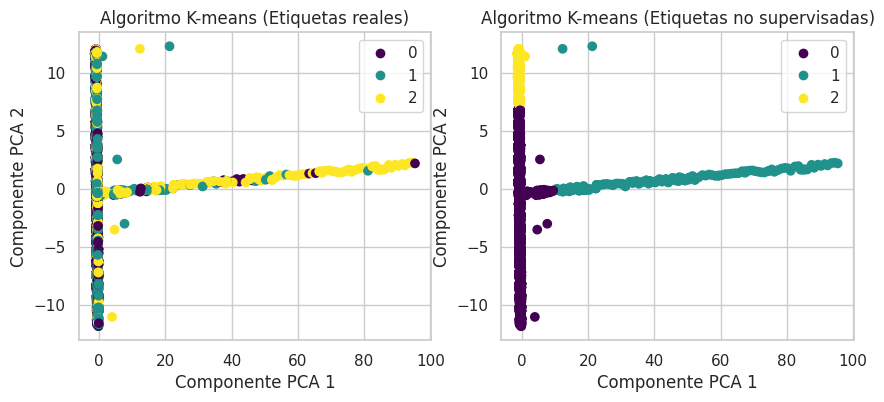

In [59]:
print(f" - Total de etiquetas: {len(y)}\n - Etiquetas predichas correctamente: {list(y-labels_ward).count(0)}")

plt.figure(figsize=(10,4))
plt.subplot(121)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap="viridis")
plt.title("Algoritmo K-means (Etiquetas reales)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(y)))

plt.subplot(122)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels_ward, cmap="viridis")
plt.title("Algoritmo K-means (Etiquetas no supervisadas)")
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(labels_ward)))

---
##<font face="Times New Roman"><font size="6"><center>**Conclusiones**

---

<font face="Times New Roman"><font size="4">Como podemos observar los modelos de aprendizaje no supervisado a los que se le especifica el numero de clusters tienen un desempeño relativamente bueno acertando casi 4000 etiquetas de 12000 y posiblemente más, ya que al observar el grafico se puede notar como los grupos no supervisados pueden no coincidir con las etiquetas originales pero si con la zona del grupo.<br><br>
Uno de los mejores fue el Agglomerative Clustering, mientras que el DBSCAN tenia muchos problemas ya que se basa mas en la cercania de los puntos.

---
#<font face="Times New Roman"><font size="6"><center>**Área de prueba con registros**

---

---
##<font face="Times New Roman"><font size="6"><center>**Detalles del Modelo de predicción**

---

In [60]:
#@title **TipoViolencia**
mapa["TipoViolencia"]

{'Negligencia y abandono': 0, 'Agresion fisica': 1, 'Agresion sexual': 2}

In [61]:
#@title **Municipio**
mapa["Municipio"]

{'Bucaramanga': 0,
 'Piedecuesta': 1,
 'Cucuta': 2,
 'Valledupar': 3,
 'Arenal': 4,
 nan: 5,
 'Floridablanca': 6,
 'Giron': 7,
 'Barrancabermeja': 8,
 'El playon': 9,
 'Sogamoso': 10,
 'Ocaña': 11,
 'Pamplona': 12,
 'Rionegro': 13,
 'Bucarasica': 14,
 'Venezuela - sin especificación adicional de lugar': 15,
 'Monteria': 16,
 'Libano - sin especificación adicional de lugar': 17,
 'San gil': 18,
 'Lebrija': 19,
 'Rivera': 20,
 'Santa marta': 21,
 'Tame': 22,
 'Bogota': 23,
 'Puerto colombia': 24,
 'Zapatoca': 25,
 'El carmen de chucuri': 26,
 'Villa del rosario': 27,
 'Arauca': 28,
 'Abrego': 29,
 'Tunja': 30,
 'Barranquilla': 31,
 'Medellin': 32,
 'Socorro': 33,
 'Sabana de torres': 34,
 'San pablo': 35,
 'Estados unidos - sin especificación adicional de lugar': 36,
 'Cimitarra': 37,
 'Guaca': 38,
 'Santa rosa del sur': 39,
 'Iza': 40,
 'Los santos': 41,
 'Santa helena del opon': 42,
 'Surata': 43,
 'Abriaqui': 44,
 'Charta': 45,
 'Almirante padilla\xa0(el toro)': 46,
 'Caluma': 47,
 'P

In [62]:
#@title **Mes**
#@markdown Los meses estan en formato numerico del 1 al 12.

In [63]:
#@title **Hora**
#@markdown El tiempo esta en formato de 24 horas y se maneja como un flotante de la siguiente forma: (14:30) = (14.3)

In [64]:
#@title **EtapaVida**
mapa["EtapaVida"]

{'Adolescencia': 0,
 'Infancia': 1,
 'Jovenes': 2,
 'Primera infancia': 3,
 'Adultez': 4,
 'Persona mayor': 5}

In [65]:
#@title **Oficio**
mapa["Oficio"]

{'Otro': 0,
 'Estudiante': 1,
 'Reciclador': 2,
 'Trabajadora domestica': 3,
 'Servidor publico': 4,
 'Maestro': 5,
 nan: 6,
 'Fuerza publica': 7,
 'Persona dedicada al cuidado del hogar': 8,
 'Líder cívico': 9,
 'Persona en situación de prostitución': 10}

In [66]:
#@title **Sexo**
mapa["Sexo"]

{'Masculino': 0, 'Femenino': 1}

In [67]:
mapaModelo = {
  "GNB":GNB,
  "DT":DT,
  "RF":RF,
  "SVM":SVM,
  "GNB_PCA":GNB_PCA,
  "DT_PCA":DT_PCA,
  "RF_PCA":RF_PCA,
  "SVM_PCA":SVM_PCA
}

#@title **Modelos de Machine Learning**
mapaModelo

{'GNB': GaussianNB(),
 'DT': DecisionTreeClassifier(max_depth=9),
 'RF': RandomForestClassifier(n_estimators=7),
 'SVM': SVC(gamma=0.001, kernel='linear'),
 'GNB_PCA': GaussianNB(),
 'DT_PCA': DecisionTreeClassifier(max_depth=7),
 'RF_PCA': RandomForestClassifier(n_estimators=6),
 'SVM_PCA': SVC(gamma=0.001, kernel='linear')}

---
##<font face="Times New Roman"><font size="6"><center>**Modelo de predicción**

---

In [68]:
def registroMapeado(registro):
  registro["Municipio"] = mapa["Municipio"][registro["Municipio"]]
  registro["EtapaVida"] = mapa["EtapaVida"][registro["EtapaVida"]]
  registro["Oficio"] = mapa["Oficio"][registro["Oficio"]]
  registro["Sexo"] = mapa["Sexo"][registro["Sexo"]]
  return pd.DataFrame([registro])

In [69]:
#@title **Modelo de predicción de casos de violencia intrafamiliar**

Modelo = "DT" #@param {type:"string"}
est = mapaModelo[Modelo]
Municipio = "Giron" #@param {type:"string"}
Mes = 1 #@param {type:"number"}
Hora = 23 #@param {type:"number"}
EtapaVida = "Infancia" #@param {type:"string"}
Oficio = "Estudiante" #@param {type:"string"}
Sexo = "Femenino" #@param {type:"string"}

registro = {
  "Municipio": Municipio, # "Giron"
  "Mes": Mes, # 1
  "Hora": Hora, # 14
  "EtapaVida": EtapaVida, # "Adultez"
  "Oficio": Oficio, # "Estudiante"
  "Sexo": Sexo # "Femenino"
}

registro = registroMapeado(registro)
probabilidades = est.predict_proba(registro)
etiquetas = est.classes_
etiquetas = ['"Negligencia y abandono"', '"Agresion fisica"', '"Agresion sexual"']
probabilidades_por_clase = dict(zip(etiquetas, probabilidades[0]))

for clase, probabilidad in probabilidades_por_clase.items():
    print(f" - Probabilidad de sufrir {clase}: {probabilidad}")

 - Probabilidad de sufrir "Negligencia y abandono": 0.2
 - Probabilidad de sufrir "Agresion fisica": 0.0
 - Probabilidad de sufrir "Agresion sexual": 0.8
